In [ ]:
from google.colab import drive
import os
  
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import xgboost
from xgboost import XGBClassifier

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/신한은행 빅데이터 해커톤 1회/data_042.csv', encoding = 'cp949')

In [ ]:
data

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,B165,B166,B167,C1,E1,E2,E3,E4,E5,E6
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,0,4350000,210,0,0,11111111110,0,111111111111,1100000000
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0,0,580000,40,0,0,0,0,111110111111,10000000000
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,0,0,1950000,50,0,1101101111,0,0,111101101111,101101101111
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0,0,43000000,50,0,0,0,0,111111111111,111111111111
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,0,0,4910000,40,0,111111111111,0,0,111111111111,111111111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,F,40대_초,0,1,0,1,B은행,0,0,0,...,0,0,650000,30,111111111111,10001001100,0,0,111111111101,10111111100
473225,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,0,4790000,50,0,110110000000,0,0,111111111110,111111111000
473226,F,40대_후,1,1,1,0,B은행,0,0,0,...,0,0,1650000,60,0,100100011,0,0,111111111111,111111111111
473227,M,60대_후,1,1,1,0,A은행,0,0,0,...,0,0,1340000,50,0,100101000,0,0,111111111111,110101111111


In [ ]:
y = data[['P5']]
X_data = data.iloc[:,7:173]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.2, random_state=1)

## 랜덤포레스트로 변수선택

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature ranking:
1. feature B34 (0.042)
2. feature B15 (0.040)
3. feature B17 (0.039)
4. feature B35 (0.038)
5. feature B41 (0.038)
6. feature B33 (0.037)
7. feature B61 (0.034)
8. feature B161 (0.028)
9. feature B146 (0.025)
10. feature B40 (0.024)
11. feature B20 (0.022)
12. feature B140 (0.022)
13. feature B30 (0.022)
14. feature B58 (0.019)
15. feature B131 (0.018)
16. feature B42 (0.017)
17. feature B11 (0.016)
18. feature B38 (0.016)
19. feature B13 (0.016)
20. feature B107 (0.015)
21. feature B152 (0.015)
22. feature B19 (0.015)
23. feature B56 (0.013)
24. feature B135 (0.012)
25. feature B36 (0.012)
26. feature B16 (0.011)
27. feature B139 (0.011)
28. feature B12 (0.011)
29. feature B37 (0.011)
30. feature B164 (0.011)
31. feature B24 (0.011)
32. feature B25 (0.010)
33. feature B121 (0.010)
34. feature B27 (0.010)
35. feature B63 (0.010)
36. feature B106 (0.009)
37. feature B9 (0.009)
38. feature B141 (0.008)
39. feature B57 (0.008)
40. feature B108 (0.008)
41. feature B48 (0.0

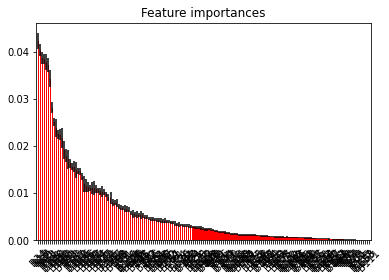

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#### 모델 검증

In [ ]:
indices = np.argsort(importances)[::-1]
features = []

for f in range(0, 16):
  features.append(X_train.columns[indices][f])

X_fitted = X_train[features]

In [ ]:
params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_fitted, y_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 200}
최적 예측 정확도: 0.0162


In [ ]:
rf = RandomForestRegressor(n_estimators = , min_samples_leaf = , n_jobs = -1)
rf.fit(X_data, y)

In [ ]:
def permutation_importances(rf, X_train, y_train, metric):
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(rf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)

permutation_importances(rf, X_data, y)

## XGBoost

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


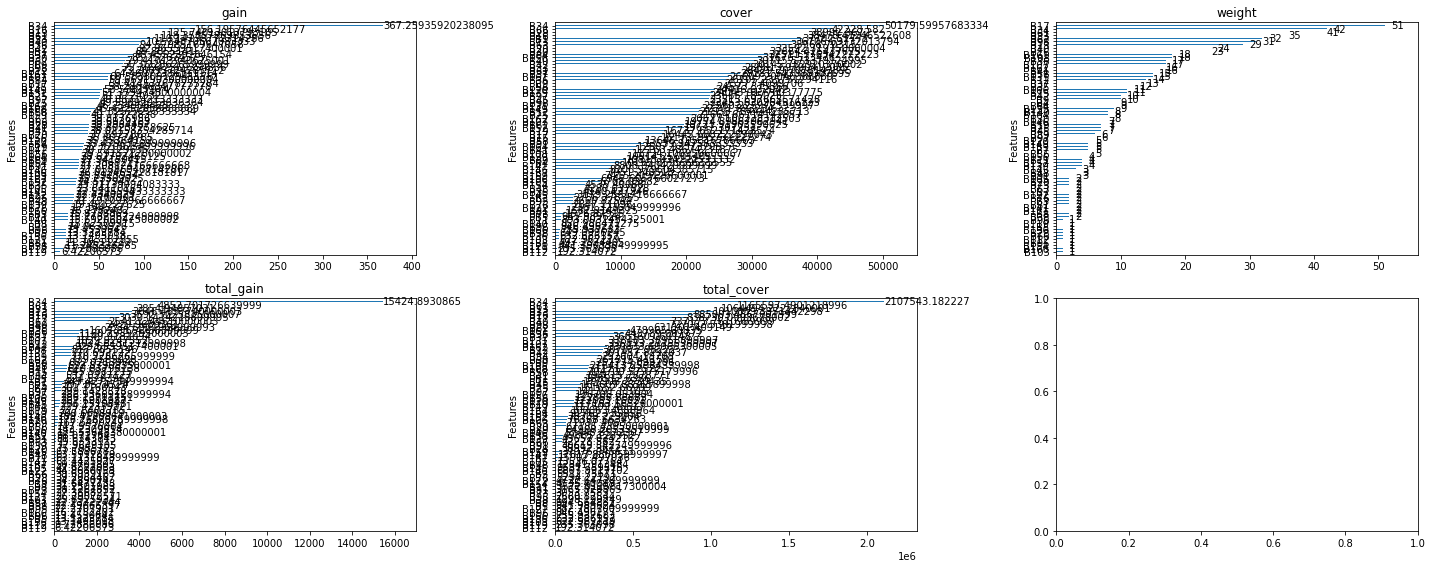

In [ ]:
xgb = XGBClassifier(booster='gbtree', importance_type='gain')
xgb.fit(X_data, y)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

axes = [ax for row_axes in axes for ax in row_axes]

xgboost.plot_importance(xgb, importance_type='gain', title='gain', xlabel='', grid=False, ax=axes[0])
xgboost.plot_importance(xgb, importance_type='cover', title='cover', xlabel='', grid=False, ax=axes[1])
xgboost.plot_importance(xgb, importance_type='weight', title='weight', xlabel='', grid=False, ax=axes[2])
xgboost.plot_importance(xgb, importance_type='total_gain', title='total_gain', xlabel='', grid=False, ax=axes[3])
xgboost.plot_importance(xgb, importance_type='total_cover', title='total_cover', xlabel='', grid=False, ax=axes[4])
plt.tight_layout()
plt.show()